# Customer Conversion Prediction

## Problem Statement
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers.
Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur 
a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that 
they can be specifically targeted via call. We are given the historical marketing data of the insurance 
company and are required to build a ML model that will predict if a client will subscribe to the insurance.


# FEATURES:

* age (numeric)

* job : type of job

* marital : marital status

* educational_qual : education status

* call_type : contact communication type

* day: last contact day of the month (numeric)

* mon: last contact month of year

* dur: last contact duration, in seconds (numeric)

* num_calls: number of contacts performed during this campaign and for this client

* prev_outcome: outcome of the previous marketing (categorical: "unknown","other","failure","success")

* Output variable (target)

* y - has the client subscribed to the insurance or not ?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
df['y'].value_counts()   #data is not balnced

no     39922
yes     5289
Name: y, dtype: int64

# data preprocessing

In [7]:
df.isnull().sum()   #missing value


age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
# data type

In [12]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [13]:
#unique values

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [15]:
print(df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [16]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [17]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [18]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [19]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [20]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [21]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
#converting Target column into numerical 

In [23]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [24]:
df['target'] = df['y'].map({'yes':1, 'no':0})

C:\Users\vijay\AppData\Local\Temp\ipykernel_3676\3993001043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['y'].map({'yes':1, 'no':0})


In [25]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


In [26]:
df.age.value_counts().sort_values()

94       1
92       2
93       2
88       2
95       2
      ... 
35    1894
34    1929
33    1972
31    1996
32    2084
Name: age, Length: 77, dtype: int64

In [27]:
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

In [28]:
#Taking job value counts compare with target

In [29]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [30]:
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [31]:
df['job'] = df['job'].replace('unknown',np.nan)  #replacing unknown value as NAN

C:\Users\vijay\AppData\Local\Temp\ipykernel_3676\2498876954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace('unknown',np.nan)  #replacing unknown value as NAN


In [32]:
df.job.isnull().sum()

288

In [33]:
df=df.dropna(subset=['job'])

In [34]:
df.job.isnull().sum()

0

In [35]:
#value count for marital status vs target

In [36]:
df.marital.value_counts()

married     27007
single      12720
divorced     5190
Name: marital, dtype: int64

In [37]:
df.groupby('marital')['target'].mean()  #checking mean marital vs target

marital
divorced    0.119653
married     0.101233
single      0.149371
Name: target, dtype: float64

In [38]:
#value count for education qualification vs target

In [39]:
df.education_qual.value_counts()

secondary    23128
tertiary     13260
primary       6799
unknown       1730
Name: education_qual, dtype: int64

In [40]:
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086483
secondary    0.105543
tertiary     0.150226
unknown      0.135260
Name: target, dtype: float64

In [41]:
print('percentage of "unknown":',((1730)/(23128+13260+6790+1730)*100))

percentage of "unknown": 3.852320299278525


In [42]:
'unknow percentage iz 3.8 so we can remove it frm dataset'

'unknow percentage iz 3.8 so we can remove it frm dataset'

In [43]:
df['education_qual']=df['education_qual'].replace('unknown',np.nan)

C:\Users\vijay\AppData\Local\Temp\ipykernel_3676\4123544792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual']=df['education_qual'].replace('unknown',np.nan)


In [44]:
df.education_qual.isnull().sum()

1730

In [45]:
df = df.dropna(subset=['education_qual'])

In [46]:
df.education_qual.isnull().sum()

0

In [47]:
#value counts for calltype vs target

In [48]:
df.call_type.value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [49]:
print('percentage of unknown')

percentage of unknown


In [50]:
df.groupby('call_type')['target'].mean()

call_type
cellular     0.147572
telephone    0.129918
unknown      0.041358
Name: target, dtype: float64

In [51]:
print('percentage of "unknown": ' ,((12283)/(28210+12283+2964))*100)

percentage of "unknown":  28.26472144878846


In [52]:
#unknown percentage value is 28.2 

In [53]:
#value count foe day vs target

In [54]:
df.day.value_counts()

20    2628
18    2227
21    1961
17    1872
6     1817
5     1796
14    1784
8     1758
7     1739
28    1739
29    1661
19    1656
15    1649
12    1542
13    1529
9     1483
30    1481
11    1397
4     1372
16    1331
2     1243
27    1072
3     1039
26     994
23     900
22     875
25     810
31     597
10     504
24     426
1      305
Name: day, dtype: int64

In [55]:
df.groupby('day')['target'].mean()

day
1     0.278689
2     0.139179
3     0.166506
4     0.160350
5     0.114143
6     0.094111
7     0.086832
8     0.105802
9     0.113284
10    0.224206
11    0.121689
12    0.153696
13    0.152387
14    0.109305
15    0.141298
16    0.133734
17    0.090812
18    0.100584
19    0.069444
20    0.070396
21    0.098929
22    0.162286
23    0.131111
24    0.143192
25    0.155556
26    0.105634
27    0.125933
28    0.075331
29    0.074052
30    0.173531
31    0.073702
Name: target, dtype: float64

In [56]:
#values counts for month vs target

In [57]:
df.mon.value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [58]:
df.groupby('mon')['target'].mean()

mon
apr    0.192553
aug    0.109196
dec    0.465000
feb    0.165022
jan    0.100152
jul    0.088788
jun    0.105062
mar    0.537946
may    0.067319
nov    0.101510
oct    0.430435
sep    0.471805
Name: target, dtype: float64

In [59]:
#value count for duration

In [60]:
df.dur.value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [61]:
df.dur.value_counts()

124     176
90      172
89      172
114     172
122     169
       ... 
1327      1
1331      1
1608      1
1833      1
1556      1
Name: dur, Length: 1558, dtype: int64

In [62]:
df.groupby('dur')['target'].mean()

dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1558, dtype: float64

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [64]:
#value counts for numcall vs target

In [65]:
df.num_calls.value_counts()

1     16740
2     11936
3      5277
4      3397
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
25       22
22       20
24       20
23       20
28       16
29       13
26       12
31       11
32        9
27        9
30        8
33        6
34        4
36        4
38        3
35        3
43        2
50        2
41        2
51        1
37        1
46        1
55        1
58        1
39        1
44        1
Name: num_calls, dtype: int64

In [66]:
df.groupby('num_calls')['target'].mean()

num_calls
1     0.145221
2     0.110841
3     0.111237
4     0.088902
5     0.079859
6     0.072123
7     0.064655
8     0.058140
9     0.065147
10    0.050980
11    0.078947
12    0.026846
13    0.048780
14    0.047059
15    0.049383
16    0.026667
17    0.076923
18    0.000000
19    0.000000
20    0.023810
21    0.030303
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.076923
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
Name: target, dtype: float64

In [67]:
#value count for previous outcome vs target

In [68]:
df.prev_outcome.value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [69]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.124655
other      0.165163
success    0.643961
unknown    0.091383
Name: target, dtype: float64

In [70]:
print('percentage of "unknown ":',((35280)/(35280+4709+1774+1424)*100))

percentage of "unknown ": 81.69124968161715


In [71]:
#value count for target vs y

In [72]:
df.y.value_counts()

no     38166
yes     5021
Name: y, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


# outlier

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43187 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             43187 non-null  int64 
 1   job             43187 non-null  object
 2   marital         43187 non-null  object
 3   education_qual  43187 non-null  object
 4   call_type       43187 non-null  object
 5   day             43187 non-null  int64 
 6   mon             43187 non-null  object
 7   dur             43187 non-null  int64 
 8   num_calls       43187 non-null  int64 
 9   prev_outcome    43187 non-null  object
 10  y               43187 non-null  object
 11  target          43187 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.3+ MB


In [75]:
#age

<Axes: xlabel='age'>

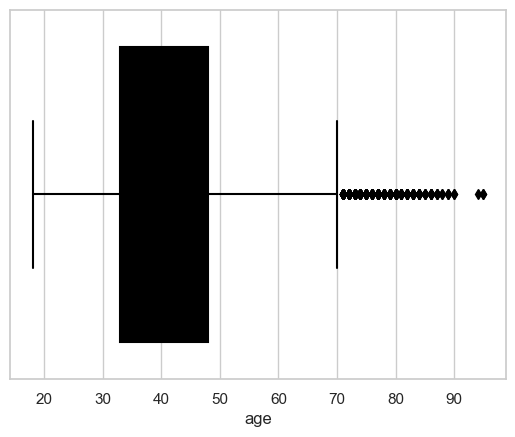

In [76]:
sb.set(style='whitegrid')
sb.boxplot(x=df['age'],color='black')

In [77]:
# IQR

In [78]:
q1,q3 = np.percentile(df['age'],[25,75])
IQR = q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print(upper,lower)

70.5 10.5


In [79]:
#removing outlier from age

In [80]:
#clip function
df.age = df.age.clip(10.5,70.5)

In [81]:
df.age.describe()

count    43187.000000
mean        40.702549
std         10.305239
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

In [82]:
#after removing outlier

<Axes: xlabel='age'>

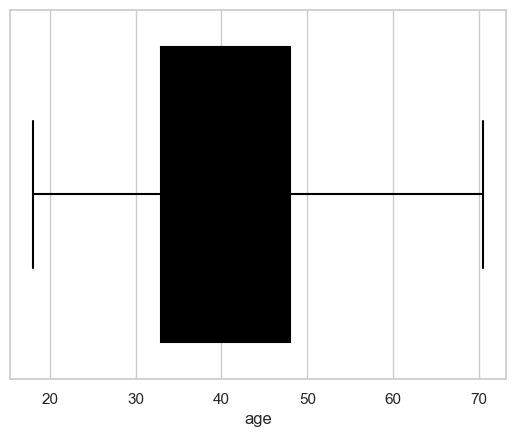

In [83]:
sb.set(style='whitegrid')
sb.boxplot(x=df['age'],color='black')

In [84]:
#DAY

<Axes: xlabel='day'>

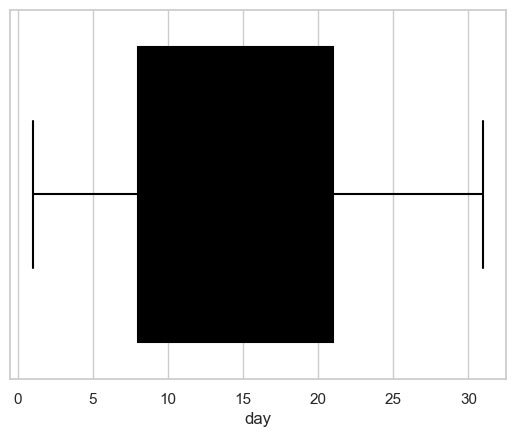

In [85]:
sb.set(style='whitegrid')
sb.boxplot(x=df['day'],color='black')

In [86]:
#DURATION

<Axes: xlabel='dur'>

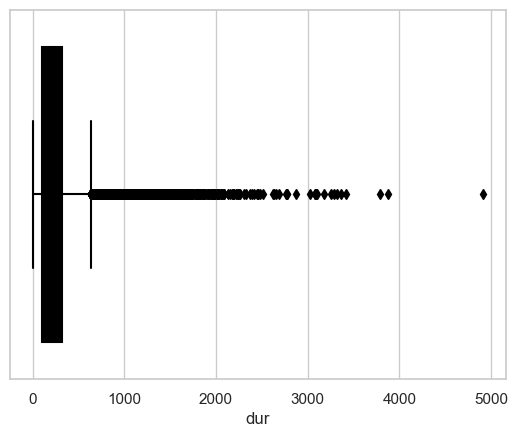

In [87]:
sb.set(style='whitegrid')
sb.boxplot(x=df['dur'],color='black')

In [88]:
#IQR

In [89]:
q1,q3=np.percentile(df['dur'],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print(upper,lower)

640.5 -219.5


In [90]:
#Removing outlier by clip

In [91]:
df.dur = df.dur.clip(-219.5,640.5)

<Axes: xlabel='dur'>

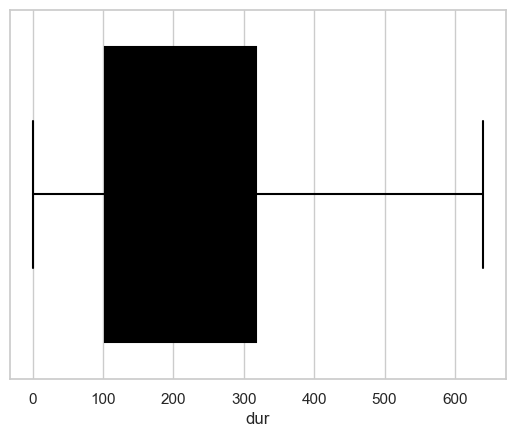

In [92]:
sb.set(style='whitegrid')
sb.boxplot(x=df['dur'],color = 'black')

In [93]:
df.dur.describe()

count    43187.000000
mean       234.788038
std        176.240001
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max        640.500000
Name: dur, dtype: float64

In [94]:
#No of call 

<Axes: xlabel='num_calls'>

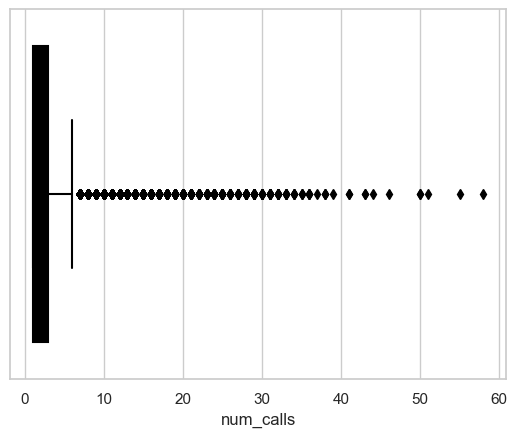

In [95]:
sb.set(style='whitegrid')
sb.boxplot(x=df['num_calls'],color = 'black')

In [96]:
#IQR

In [97]:
q1,q3=np.percentile(df['num_calls'],[25,75])
IQR= q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print(upper,lower)

6.0 -2.0


In [98]:
df.num_calls= df.num_calls.clip(-2.0,6.0)

<Axes: xlabel='num_calls'>

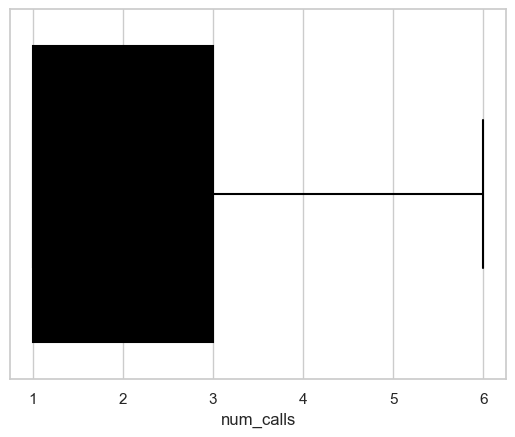

In [99]:
sb.set(style='whitegrid')
sb.boxplot(x=df['num_calls'],color='black')

# DATA VISUALISATION

#### FEATURE VS TARGET

In [102]:
# F vs T for cat job ,maritial , edu qual,call type, month

In [103]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

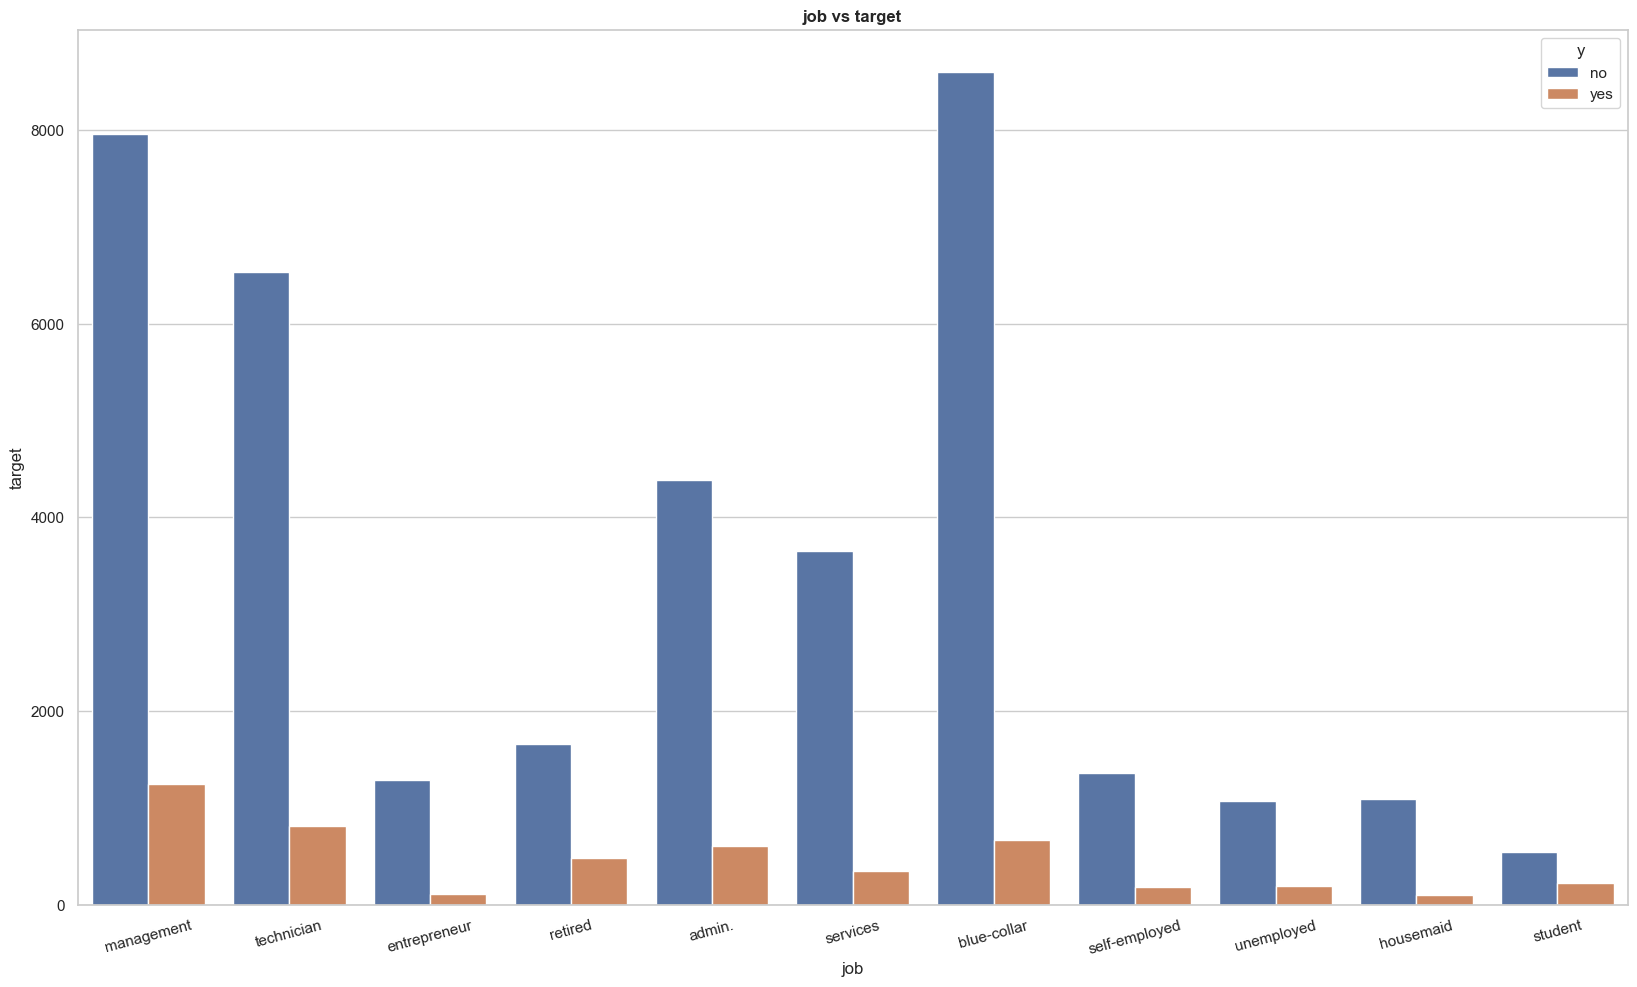

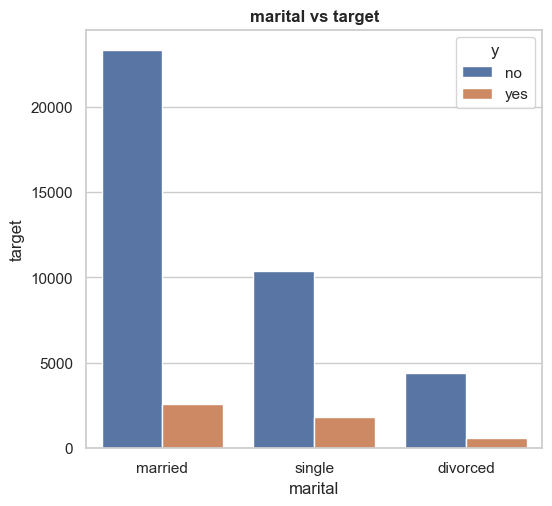

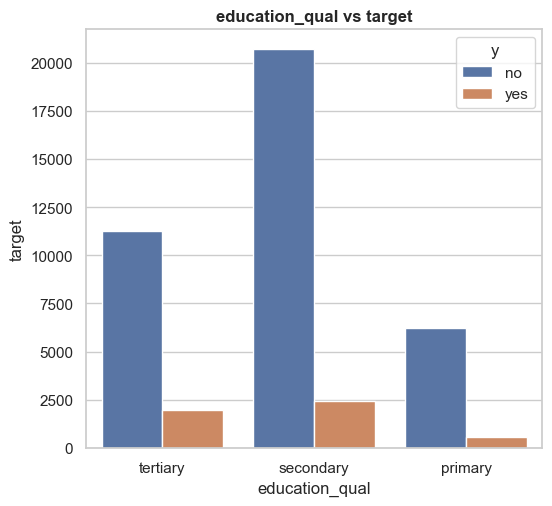

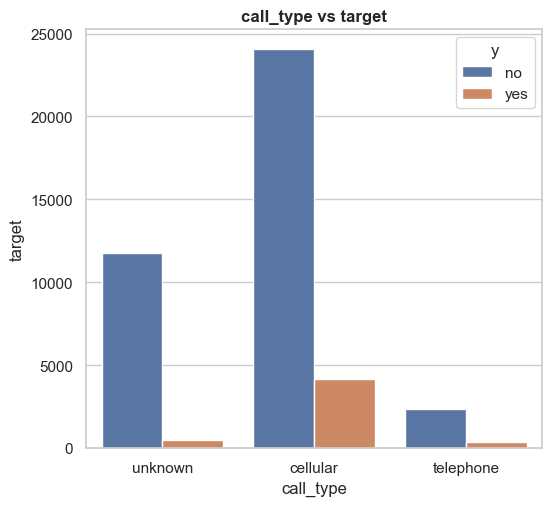

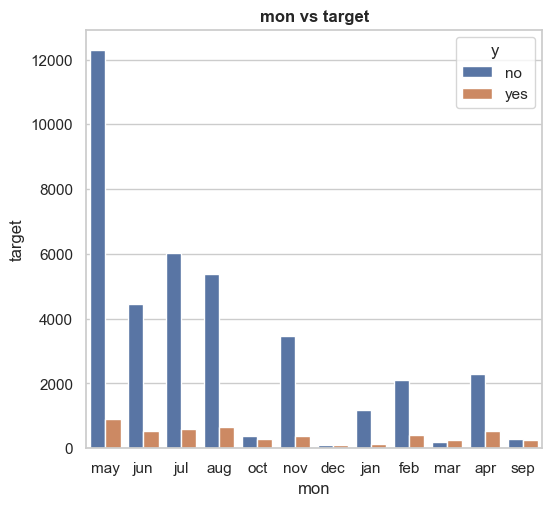

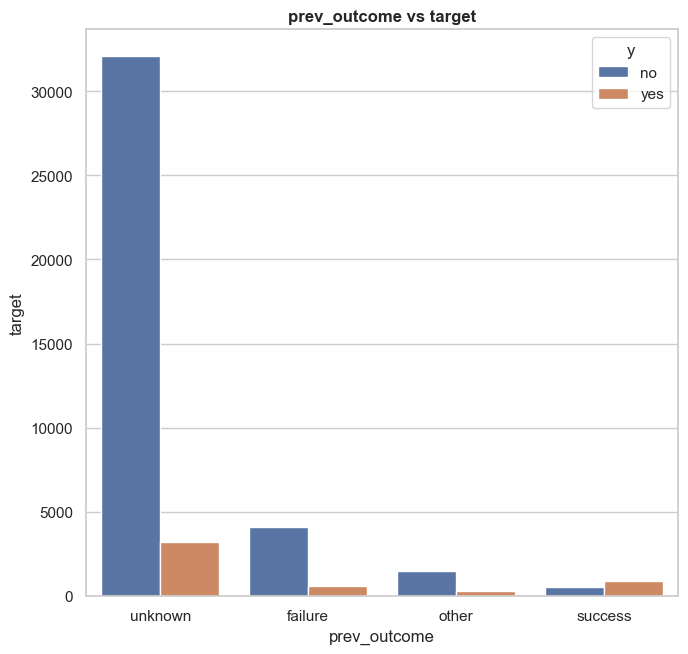

In [104]:
#job
plt.figure(figsize=(20,25))
plt.subplot(211)
sb.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=15)
plt.title('job vs target', fontweight='bold')
plt.xlabel('job')
plt.ylabel('target')

#maritial
plt.figure(figsize=(20,25))
plt.subplot(431)
sb.countplot(x='marital',hue='y',data=df)
plt.title('marital vs target',fontweight='bold')
plt.xlabel('marital')
plt.ylabel('target')

#education qual
plt.figure(figsize=(20,25))
plt.subplot(432)
sb.countplot(x='education_qual',hue='y',data=df)
plt.title('education_qual vs target', fontweight='bold')
plt.xlabel('education_qual')
plt.ylabel('target')

# #call_type

plt.figure(figsize=(20,25))
plt.subplot(433)
sb.countplot(x='call_type',hue='y',data=df)
plt.title('call_type vs target', fontweight='bold')
plt.xlabel('call_type')
plt.ylabel('target')

#mon

plt.figure(figsize=(20,25))
plt.subplot(434)
sb.countplot(x='mon',hue='y',data=df)
plt.title('mon vs target',fontweight='bold')
plt.xlabel('mon')
plt.ylabel('target')

#previous outcome

plt.figure(figsize=(20,25))
plt.subplot(435)
sb.countplot(x='prev_outcome',hue='y',data=df)
plt.title('prev_outcome vs target',fontweight='bold')
plt.xlabel('prev_outcome')
plt.ylabel('target')


plt.tight_layout()

In [105]:
#feature vs target using bar plot

In [106]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Text(0, 0.5, 'target')

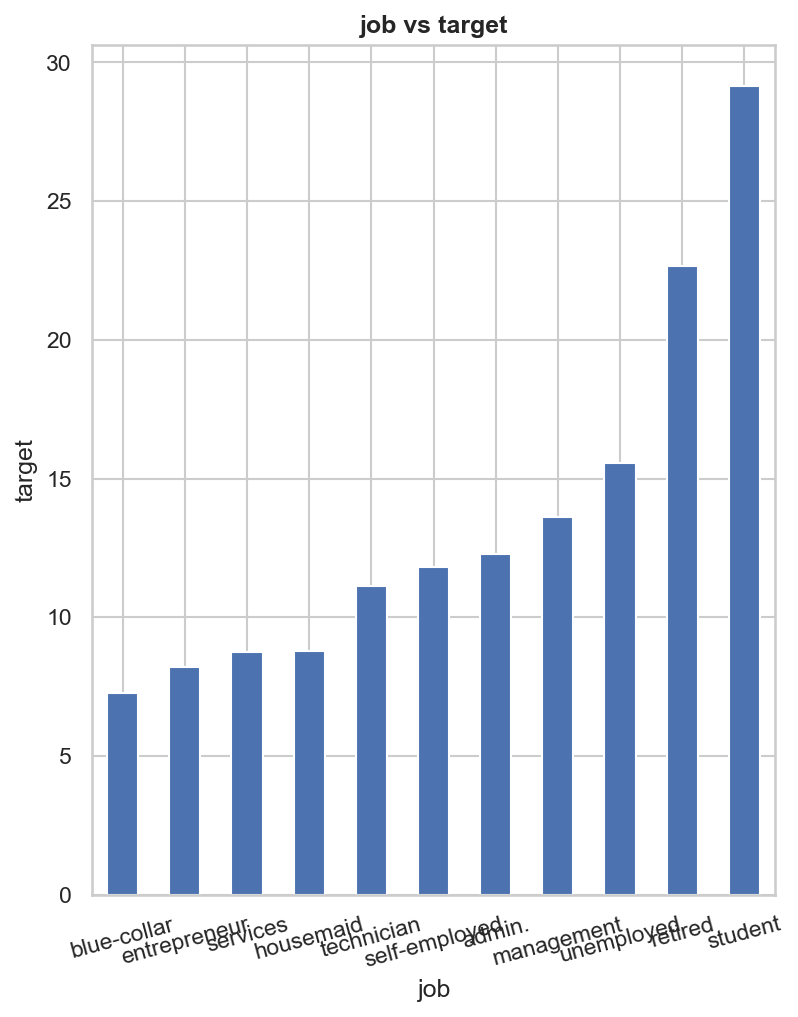

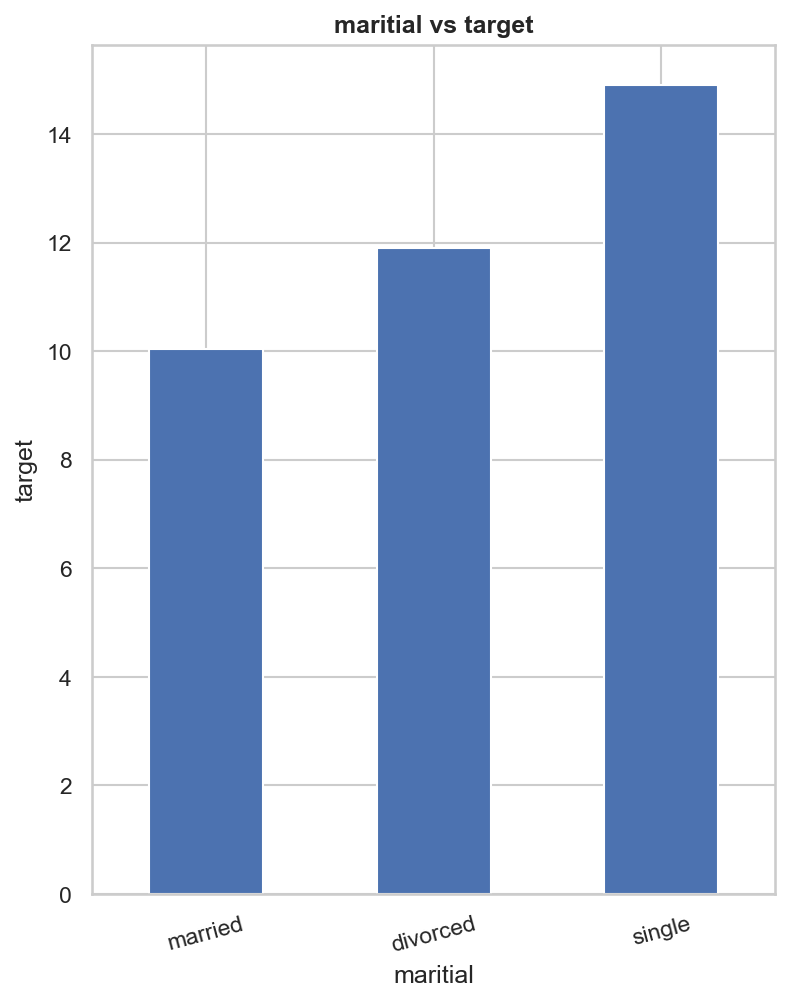

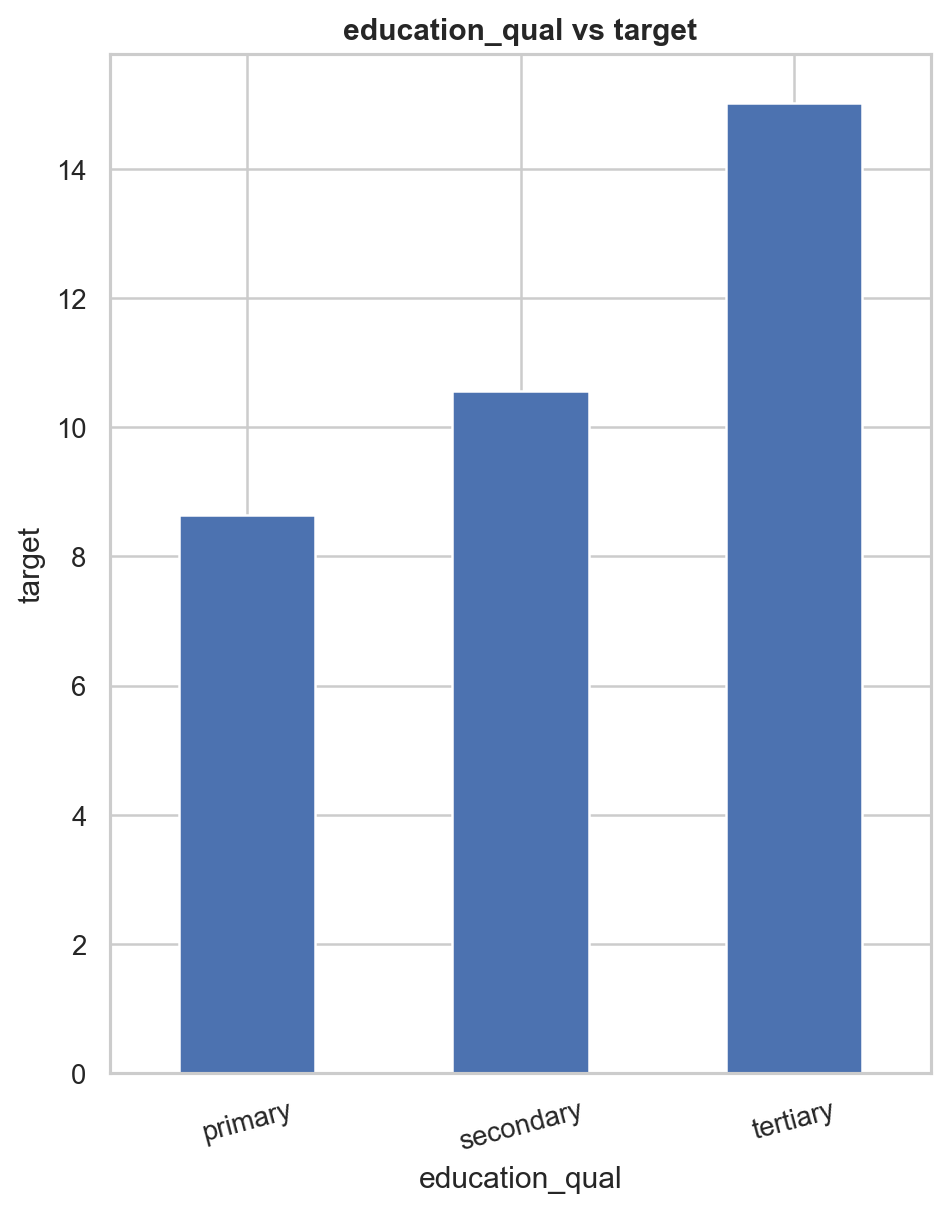

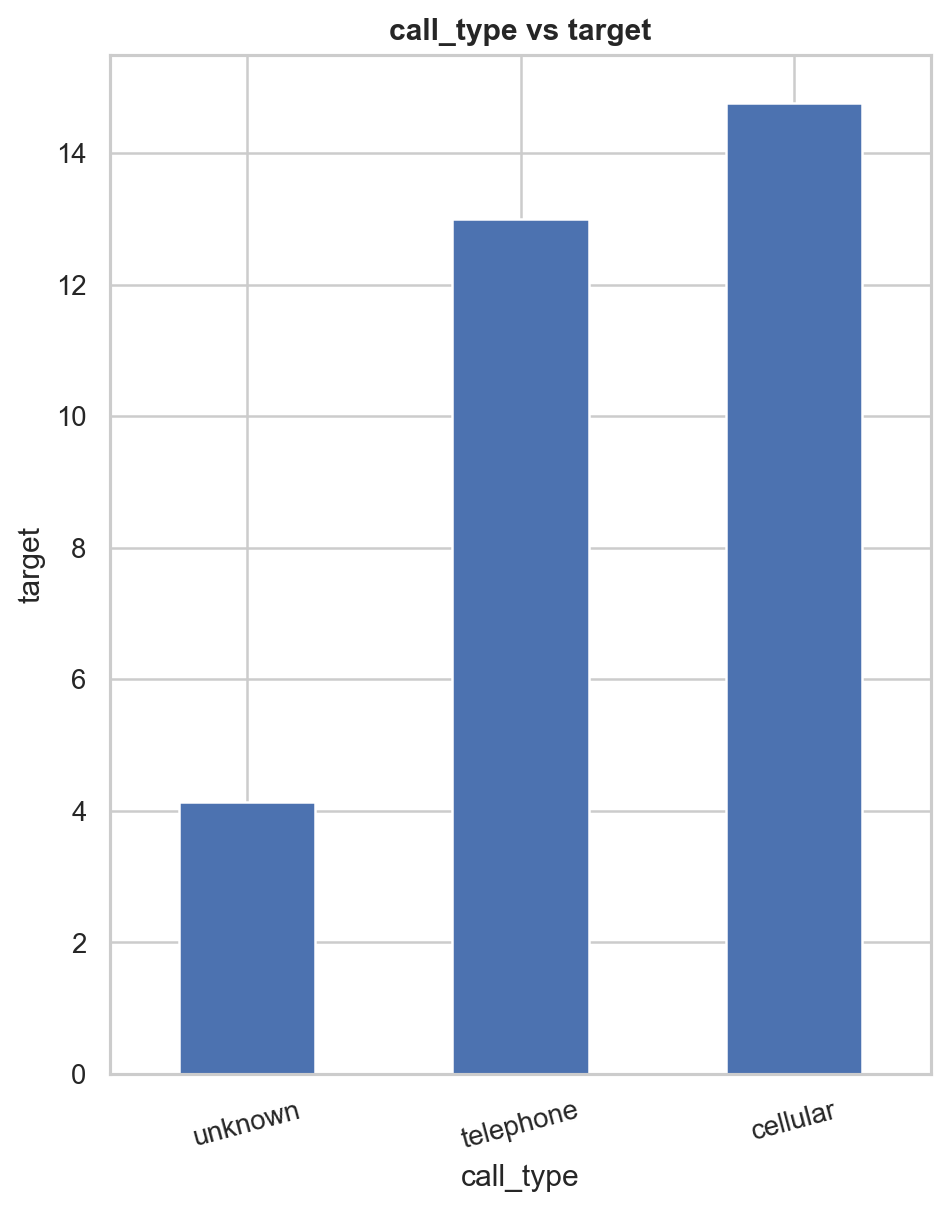

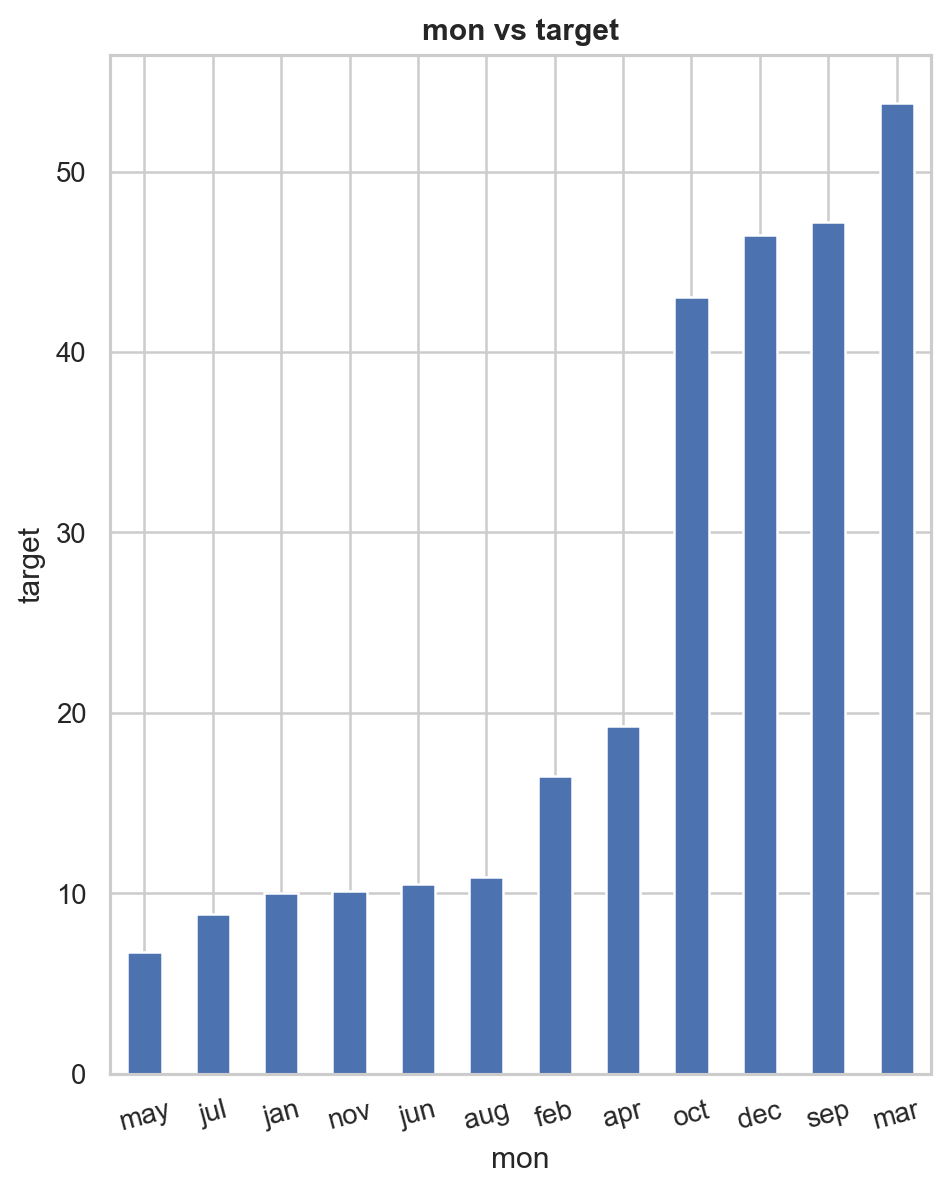

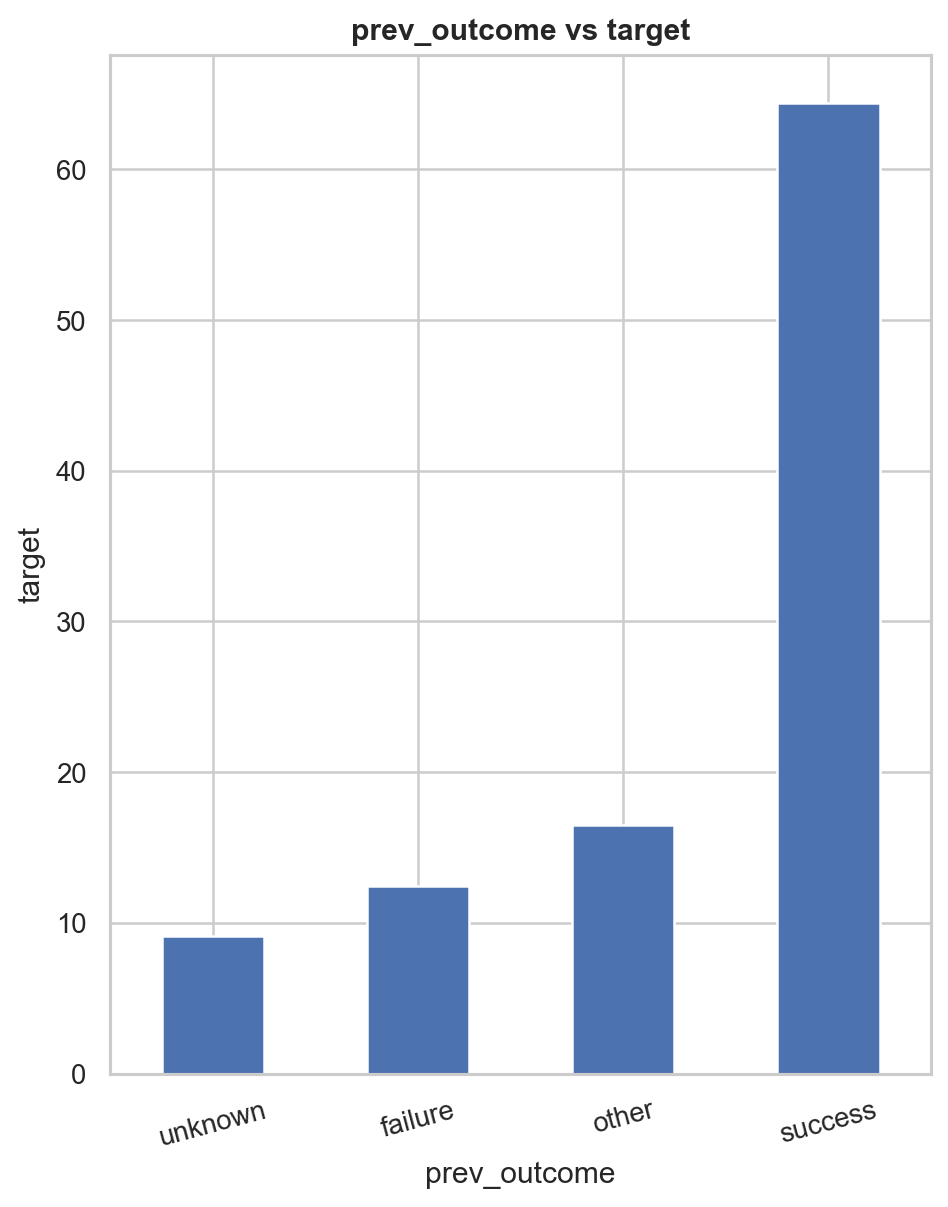

In [107]:
#job vs target

plt.figure(figsize=(20,25),dpi=150)
plt.subplot(3,3,1)
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('job vs target',fontweight='bold')
plt.xlabel('job')
plt.ylabel('target')

#marital status vs target

plt.figure(figsize=(20,25),dpi=150)
plt.subplot(332)
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('maritial vs target',fontweight='bold')
plt.xlabel('maritial')
plt.ylabel('target')

#edu_qual vs target

plt.figure(figsize=(20,25),dpi=180)
plt.subplot(333)
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('education_qual vs target',fontweight='bold')
plt.xlabel('education_qual')
plt.ylabel('target')

#call_type vs target

plt.figure(figsize=(20,25),dpi=180)
plt.subplot(334)
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('call_type vs target',fontweight='bold')
plt.xlabel('call_type')
plt.ylabel('target')

#mon vs target

plt.figure(figsize=(20,25),dpi=180)
plt.subplot(335)
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('mon vs target',fontweight='bold')
plt.xlabel('mon')
plt.ylabel('target')

#previous outcome

plt.figure(figsize=(20,25),dpi=180)
plt.subplot(336)
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='bar')
plt.xticks(rotation=15)
plt.title('prev_outcome vs target',fontweight='bold')
plt.xlabel('prev_outcome')
plt.ylabel('target')



In [108]:
#numerical vs target variable age, day,dur,num calls using line plot

In [109]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

Text(0, 0.5, 'target')

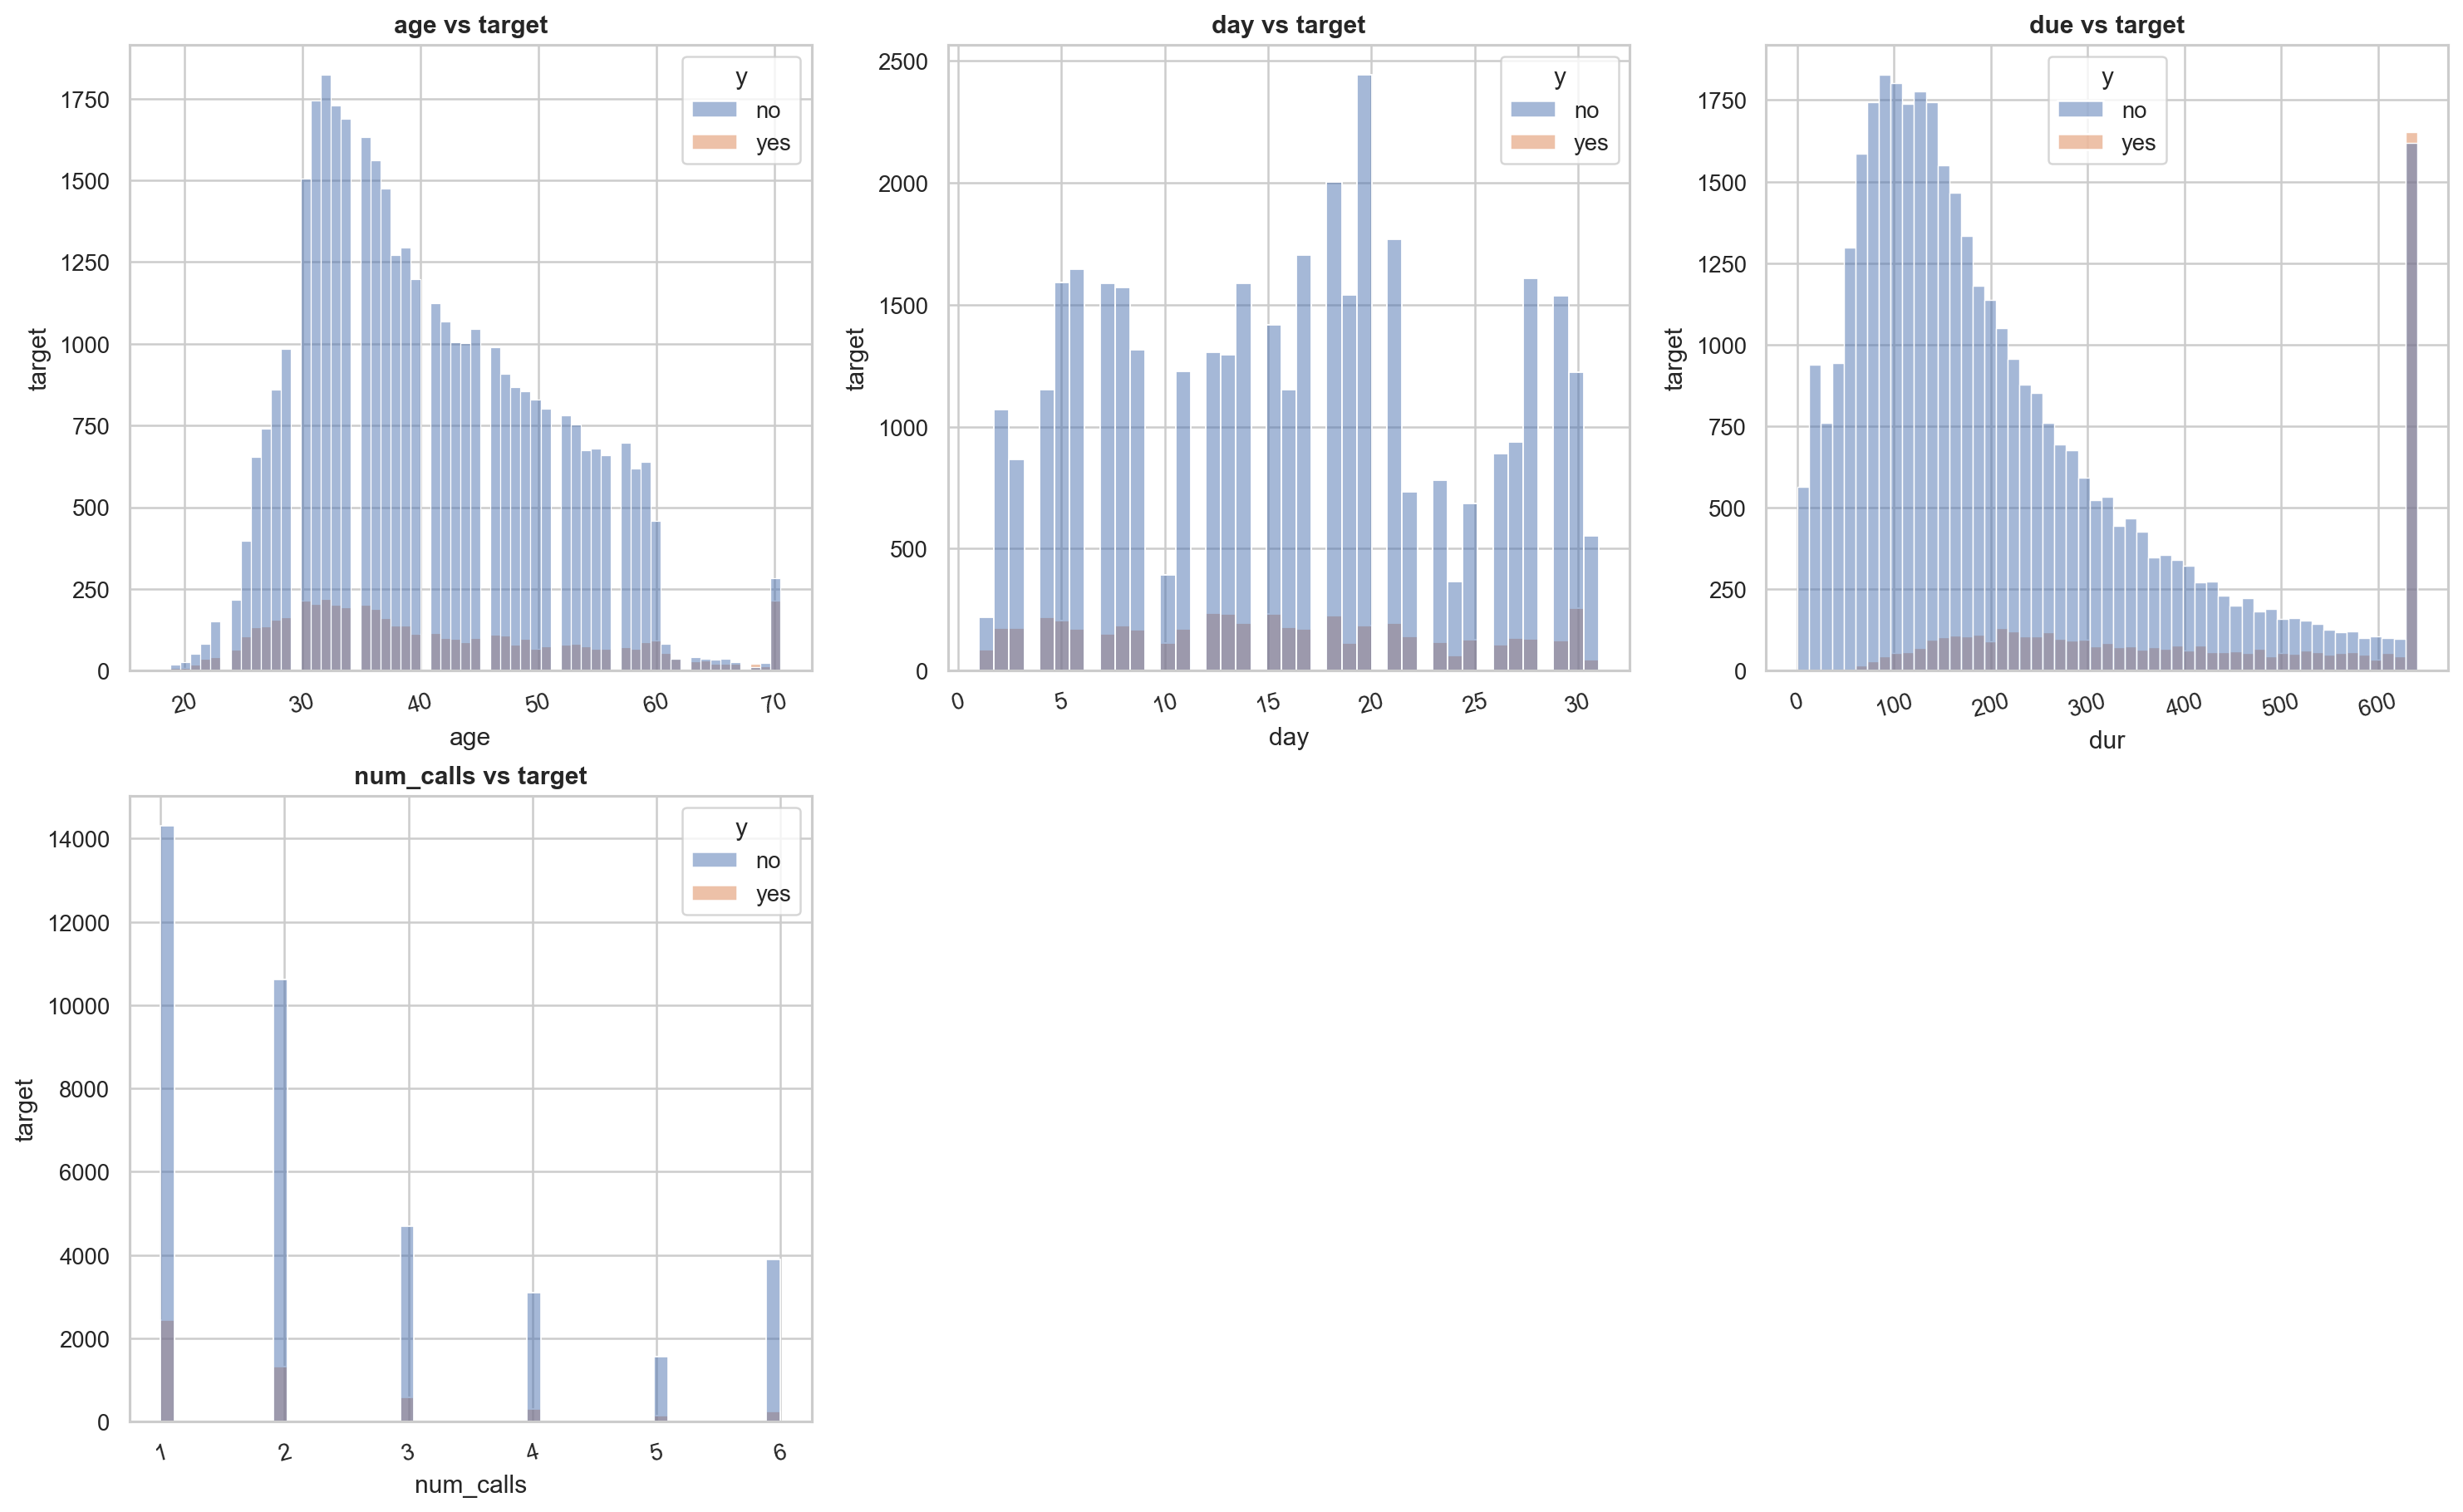

In [110]:
#age vs target
plt.figure(figsize=(20,25),dpi=180)
plt.subplot(431)
sb.histplot(x='age',hue='y',data=df)
plt.xticks(rotation=15)
plt.title('age vs target',fontweight='bold')
plt.xlabel('age')
plt.ylabel('target')

#day
plt.subplot(432)
sb.histplot(x='day',hue='y',data=df)
plt.xticks(rotation=15)
plt.title('day vs target', fontweight='bold')
plt.xlabel('day')
plt.ylabel('target')

#dur 

plt.subplot(433)
sb.histplot(x='dur',hue='y',data=df)
plt.xticks(rotation=15)
plt.title('due vs target', fontweight='bold')
plt.xlabel('dur')
plt.ylabel('target')

# num_calls
plt.subplot(434)
sb.histplot(x='num_calls',hue='y',data=df)
plt.xticks(rotation=15)
plt.title('num_calls vs target',fontweight='bold')
plt.xlabel('num_calls')
plt.ylabel('target')


# ENCODING

In [111]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [112]:
# encoding job

In [113]:
df.job.value_counts()

blue-collar      9276
management       9215
technician       7354
admin.           4999
services         4003
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: job, dtype: int64

In [114]:
df['job']=df['job'].map({'blue-collar':1,'management':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11})

In [115]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,married,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,3,single,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,8,married,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,2,married,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,2,single,tertiary,unknown,5,may,217.0,1,unknown,no,0


In [116]:
#encoding marital 

In [117]:
df.marital.value_counts()

married     25942
single      12217
divorced     5028
Name: marital, dtype: int64

In [118]:
df['marital']=df['marital'].map({'married':1,'single':2,'divorced':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,1,tertiary,unknown,5,may,261.0,1,unknown,no,0
1,44.0,3,2,secondary,unknown,5,may,151.0,1,unknown,no,0
2,33.0,8,1,secondary,unknown,5,may,76.0,1,unknown,no,0
5,35.0,2,1,tertiary,unknown,5,may,139.0,1,unknown,no,0
6,28.0,2,2,tertiary,unknown,5,may,217.0,1,unknown,no,0


In [119]:
#encoding educational qualification

In [120]:
df.education_qual.value_counts()

secondary    23128
tertiary     13260
primary       6799
Name: education_qual, dtype: int64

In [121]:
df['education_qual']=df['education_qual'].map({'secondary':1,'tertiary':2,'primary':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,1,2,unknown,5,may,261.0,1,unknown,no,0
1,44.0,3,2,1,unknown,5,may,151.0,1,unknown,no,0
2,33.0,8,1,1,unknown,5,may,76.0,1,unknown,no,0
5,35.0,2,1,2,unknown,5,may,139.0,1,unknown,no,0
6,28.0,2,2,2,unknown,5,may,217.0,1,unknown,no,0


In [122]:
#encoding month

In [123]:
df.mon.value_counts()

may    13191
jul     6600
aug     6035
jun     4978
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: mon, dtype: int64

In [124]:
df['mon']=df['mon'].map({'may':1,'jul':2,'aug':3,'jun':4,'nov':5,'apr':6,'feb':7,'jan':8,'oct':9,'sep':10,'mar':11,'dec':12})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,1,2,unknown,5,1,261.0,1,unknown,no,0
1,44.0,3,2,1,unknown,5,1,151.0,1,unknown,no,0
2,33.0,8,1,1,unknown,5,1,76.0,1,unknown,no,0
5,35.0,2,1,2,unknown,5,1,139.0,1,unknown,no,0
6,28.0,2,2,2,unknown,5,1,217.0,1,unknown,no,0


In [125]:
#encoding calltype

In [126]:
df.call_type.value_counts()

cellular     28210
unknown      12283
telephone     2694
Name: call_type, dtype: int64

In [127]:
df['call_type']=df['call_type'].map({'cellular':1,'unknown':2,'telephone':3})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,1,2,2,5,1,261.0,1,unknown,no,0
1,44.0,3,2,1,2,5,1,151.0,1,unknown,no,0
2,33.0,8,1,1,2,5,1,76.0,1,unknown,no,0
5,35.0,2,1,2,2,5,1,139.0,1,unknown,no,0
6,28.0,2,2,2,2,5,1,217.0,1,unknown,no,0


In [128]:
#encoding previous outcome

In [129]:
df.prev_outcome.value_counts()

unknown    35280
failure     4709
other       1774
success     1424
Name: prev_outcome, dtype: int64

In [130]:
df['prev_outcome']=df['prev_outcome'].map({'unknown':1,'failure':2,'other':3,'success':4})
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,2,1,2,2,5,1,261.0,1,1,no,0
1,44.0,3,2,1,2,5,1,151.0,1,1,no,0
2,33.0,8,1,1,2,5,1,76.0,1,1,no,0
5,35.0,2,1,2,2,5,1,139.0,1,1,no,0
6,28.0,2,2,2,2,5,1,217.0,1,1,no,0


In [131]:
del df['y'] #del y column becasue we have 'target' insted of 'y'. we alredy encoded it.

In [132]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58.0,2,1,2,2,5,1,261.0,1,1,0
1,44.0,3,2,1,2,5,1,151.0,1,1,0
2,33.0,8,1,1,2,5,1,76.0,1,1,0
5,35.0,2,1,2,2,5,1,139.0,1,1,0
6,28.0,2,2,2,2,5,1,217.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,3,1,2,1,17,5,640.5,3,1,1
45207,70.5,6,3,3,1,17,5,456.0,2,1,1
45208,70.5,6,1,1,1,17,5,640.5,5,4,1
45209,57.0,1,1,1,3,17,5,508.0,4,1,0


# Feature vs Target Selection

In [133]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [134]:
# x -> Feature
# y -> Target

In [135]:
x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

# Spliting

In [136]:
#setting the data train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

# Balancing

In [137]:
#balancing the data

from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)



In [138]:
print(len(x_train_smt))
print(len(y_train_smt))

52191
52191


# Scaling

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)


# MODELLING

# LogisticRegression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()

lr.fit(x_train_scaled,y_train_smt)
lr.score(x_test_scaled,y_test)

0.7523732345450336

In [141]:
y_pred=lr.predict_proba(x_test_scaled)
y_pred

array([[0.30136257, 0.69863743],
       [0.98798869, 0.01201131],
       [0.68249822, 0.31750178],
       ...,
       [0.21771298, 0.78228702],
       [0.08031857, 0.91968143],
       [0.92221692, 0.07778308]])

In [142]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
print('AUROc Score for LogisticRegression : ',round(log_reg_auroc,2))

AUROc Score for LogisticRegression :  0.87


# KNN(K-Nearest-Neighbour)

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn=KNeighborsClassifier(i)
    knn.fit(x_train_scaled,y_train_smt)
    print('K value:',i,'Train Score:',knn.score(x_train_scaled,y_train_smt),"Cross Value Accuracy:", np.mean(cross_val_score(knn,x_test_scaled,y_test,cv=10)))

K value: 1 Train Score: 1.0 Cross Value Accuracy: 0.8662914145315652
K value: 2 Train Score: 0.9947117319078002 Cross Value Accuracy: 0.8882853740182824
K value: 3 Train Score: 0.97861700293154 Cross Value Accuracy: 0.8870123599845499
K value: 4 Train Score: 0.9773332566917667 Cross Value Accuracy: 0.8902531007252907
K value: 5 Train Score: 0.9674273342147114 Cross Value Accuracy: 0.887821740483241
K value: 6 Train Score: 0.9672932114732425 Cross Value Accuracy: 0.8907155272305909
K value: 7 Train Score: 0.9610469237991225 Cross Value Accuracy: 0.8922204250890517
K value: 8 Train Score: 0.959322488551666 Cross Value Accuracy: 0.8909483498562294
K value: 9 Train Score: 0.9553371270908777 Cross Value Accuracy: 0.8937267982060856
K value: 10 Train Score: 0.9533636067521221 Cross Value Accuracy: 0.8928007381657439
K value: 20 Train Score: 0.9350462723458067 Cross Value Accuracy: 0.8919889436075705
K value: 30 Train Score: 0.9271713513824222 Cross Value Accuracy: 0.8903670979786276
K value:

##### K value=9 is a good cross validation accuracy of 0.893

In [144]:
knn= KNeighborsClassifier(i)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test)[:, 1]))
     

KNN Score:  0.7883769391062746
AUROC on the sampled dataset :  0.4948367150827539


# Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))
     

Decision Tree Score :  1.0
AUROC on the sampled dataset :  0.7924005645799209


In [146]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_train_smt,y_train_smt)
    trainaccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt))
    dt = DecisionTreeClassifier(max_depth=depth)
    valueaccuracy= cross_val_score(dt,x_test_scaled,y_test,cv=10)
    print("Depth  : ", depth, " Training Accuracy : ", trainaccuracy, " Cross val score : " ,np.mean(valueaccuracy))

Depth  :  1  Training Accuracy :  0.7885459178785614  Cross val score :  0.8850428897901377
Depth  :  2  Training Accuracy :  0.8095073863309766  Cross val score :  0.8936105210076821
Depth  :  3  Training Accuracy :  0.8641911440669847  Cross val score :  0.8955785159435216
Depth  :  4  Training Accuracy :  0.8929700523078692  Cross val score :  0.8983568301789623
Depth  :  5  Training Accuracy :  0.9077043934778027  Cross val score :  0.8975465108793614
Depth  :  6  Training Accuracy :  0.9203310915675117  Cross val score :  0.8945353740182824
Depth  :  7  Training Accuracy :  0.931559081067617  Cross val score :  0.8930311467318999
Depth  :  8  Training Accuracy :  0.9401046157383457  Cross val score :  0.8948836691558302
Depth  :  9  Training Accuracy :  0.9498955758655707  Cross val score :  0.8948834009269989
Depth  :  10  Training Accuracy :  0.9572148454714414  Cross val score :  0.8914105081326982
Depth  :  20  Training Accuracy :  0.9990228200264414  Cross val score :  0.8731

##### Depth= 4 is the good cross validation score of 0.897

In [147]:
dt = DecisionTreeClassifier(max_depth=5) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_train_smt,y_train_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))

Decision Tree Score :  0.9077043934778027
AUROC on the sampled dataset :  0.8646321503632028


# XG BOOST

In [301]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
import xgboost as xgb

In [149]:
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) # model training 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
     

Learning rate :  0.01  Train score :  0.938840029890211  Cross-Val score :  0.8897896013046651
Learning rate :  0.02  Train score :  0.9520798605123488  Cross-Val score :  0.8971986180850609
Learning rate :  0.03  Train score :  0.9607211971412696  Cross-Val score :  0.898124409896571
Learning rate :  0.04  Train score :  0.966086106800023  Cross-Val score :  0.9004396270546329
Learning rate :  0.05  Train score :  0.9695924584698511  Cross-Val score :  0.9004396270546329
Learning rate :  0.1  Train score :  0.9767776053342531  Cross-Val score :  0.9009041993905841
Learning rate :  0.11  Train score :  0.9778122664827269  Cross-Val score :  0.8990514087378225
Learning rate :  0.12  Train score :  0.9785978425399016  Cross-Val score :  0.8995154446161109
Learning rate :  0.13  Train score :  0.979709145254929  Cross-Val score :  0.9022926859362258
Learning rate :  0.14  Train score :  0.9803414381789963  Cross-Val score :  0.9013674305823784
Learning rate :  0.15  Train score :  0.98053

##### Learning rate :  0.13 and geting best Cross-Val score :  0.902

# RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)
     

In [151]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(x_train, y_train) # the model is trained
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valueaccuracy = cross_val_score(rf, x_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainaccuracy, " Cross val score : " ,np.mean(valueaccuracy))
     

Depth  :  1  Training Accuracy :  0.9990228200264414  Cross val score :  0.8834119714385553
Depth  :  2  Training Accuracy :  0.9990228200264414  Cross val score :  0.885351223481322
Depth  :  3  Training Accuracy :  0.9990228200264414  Cross val score :  0.8904453906081751
Depth  :  4  Training Accuracy :  0.9990228200264414  Cross val score :  0.8941792439311957
Depth  :  5  Training Accuracy :  0.9990228200264414  Cross val score :  0.8971604557563244
Depth  :  6  Training Accuracy :  0.9990228200264414  Cross val score :  0.9005759466781524
Depth  :  7  Training Accuracy :  0.9990228200264414  Cross val score :  0.9034703194433853
Depth  :  8  Training Accuracy :  0.9990228200264414  Cross val score :  0.9045122373271367
Depth  :  9  Training Accuracy :  0.9990228200264414  Cross val score :  0.905062190107403
Depth  :  10  Training Accuracy :  0.9990228200264414  Cross val score :  0.9050332465473451


##### Depth  :  9 is have best Cross val score :  0.905

# SOLUTION

###### Model are tested the best AUROC Score will be shown below

###### 1. Random Forest - AUROC Score is 0.905
2. KNN - AUROC Score is 0.893
3. Decision Tree - AUROC Score is 0.897
4. XG Boost - AUROC Score is 0.902
5. Logistic Regression - AUROC Score is 0.87


##### Random Forest has given the good AUROC Score of 0.905, so Random Forest is the best model for customer convertion prediction

# Feature importance

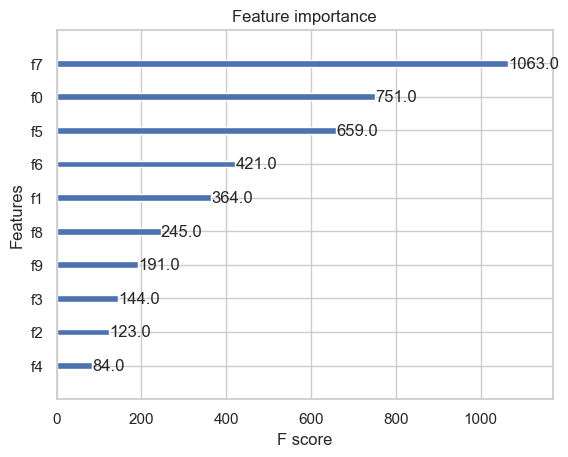

In [152]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()
     

In [153]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

'''  f0 - Age, f1 - Job, f2 - marital status, f3- educational qualification, f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - number of calls, f9 - previous outcome f10 - target  '''

# CONCLUSION:

###### Based on the Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

* The client should focused on the top few features of order given below to have them subscribed to the insurance.

* Duration - Longer the call better influncing the clients
* Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
* Day - People who subscribed to insurance are mostly mid of the month.
* Month - In the month of may people subscribed to insurance are more.
* Job - In this blue collar people are targeted more but people who subscribed more are from management job.
